# Unit-3

In [83]:
#12.1.1
import pandas as pd
log = pd.read_csv('bookmaker/log.csv', header = None)
log.columns = ['user_id', 'time', 'bet', 'win']
users = pd.read_csv('bookmaker/users.csv', encoding = 'koi8-r', sep = '\t')
#print(log.info())
#display(log.head())
#print(users.info())
#display(users.head())
print(log['time'].isna().sum())

15


In [84]:
# 12.1.2-3-4
import pandas as pd
log = pd.read_csv('bookmaker/log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
display(log.info())
display(log.dropna(axis=1).info())
display(log.dropna(axis=0).info())
'''
Еще один интересный параметр - subset. Что он делает?
Если передать в него список значений по одной оси (например, названия столбцов)
и задать при этом в параметре axis другую ось (в нашем случае 0),
то мы удалим те строки, для которых в данных столбцах находится пропуск.
То же самое работает и наоборот: нужно поменять 
axis на 1 и вместо названий столбцов передавать индексы строк.
'''
res = pd.concat([log[['user_id', 'time']].dropna(axis=1), log[['bet', 'win']]], axis=1)
display(res.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  1000 non-null   object 
 1   time     985 non-null    object 
 2   bet      485 non-null    float64
 3   win      138 non-null    float64
dtypes: float64(2), object(2)
memory usage: 31.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 14 to 991
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  133 non-null    object 
 1   time     133 non-null    object 
 2   bet      133 non-null    float64
 3   win      133 non-null    float64
dtypes: float64(2), object(2)
memory usage: 5.2+ KB


None

,user_id,bet,win
0,Запись пользователя № - user_919,NaN,NaN
1,Запись пользователя № - user_973,NaN,NaN
2,Запись пользователя № - user_903,NaN,NaN
3,Запись пользователя № - user_954,NaN,NaN
4,Запись пользователя № - user_954,NaN,NaN


In [85]:
# 12.2.1
import pandas as pd
log = pd.read_csv('bookmaker/log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
display(log)
display(log.drop_duplicates(subset=['user_id', 'time']))

,user_id,time,bet,win
0,Запись пользователя № - user_919,[2019-01-01 14:06:51,NaN,NaN
1,Запись пользователя № - user_973,[2019-01-01 14:51:16,NaN,NaN
2,Запись пользователя № - user_903,[2019-01-01 16:31:16,NaN,NaN
3,Запись пользователя № - user_954,[2019-01-01 17:17:51,NaN,NaN
4,Запись пользователя № - user_954,[2019-01-01 21:31:18,NaN,NaN
...,...,...,...,...
995,Запись пользователя № - user_984,[2019-04-20 9:59:58,9754.0,NaN
996,#error,NaN,10054.0,29265.0
997,#error,NaN,10454.0,NaN
998,#error,NaN,1000.0,NaN


,user_id,time,bet,win
0,Запись пользователя № - user_919,[2019-01-01 14:06:51,NaN,NaN
1,Запись пользователя № - user_973,[2019-01-01 14:51:16,NaN,NaN
2,Запись пользователя № - user_903,[2019-01-01 16:31:16,NaN,NaN
3,Запись пользователя № - user_954,[2019-01-01 17:17:51,NaN,NaN
4,Запись пользователя № - user_954,[2019-01-01 21:31:18,NaN,NaN
...,...,...,...,...
991,Запись пользователя № - user_965,[2019-04-20 12:55:41,800.0,6927.0
992,Запись пользователя № - user_967,[2019-04-20 14:59:36,10154.0,NaN
993,Запись пользователя № - user_973,[2019-04-20 17:09:56,10254.0,NaN
994,Запись пользователя № - user_977,[2019-04-20 18:10:07,10354.0,NaN


In [86]:
# 12.3.1
import pandas as pd
log = pd.read_csv('bookmaker/log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']

def time_improver(time):
    if type(time) == float:
        return time
    else:
        return time.replace('[', '')
    

log.time = log.time.apply(time_improver)
log = log.dropna()
log.time = pd.to_datetime(log.time)
display(log.time.max().strftime('%Y-%m-%d'))
display(log.time.head())

'2019-04-20'

14    2019-01-02 08:57:36
29    2019-01-04 13:59:42
151   2019-01-16 21:54:22
189   2019-01-21 18:34:44
205   2019-01-22 05:26:59
Name: time, dtype: datetime64[ns]

In [87]:
# 12.4.1
import pandas as pd
log = pd.read_csv('bookmaker/log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log = log.dropna()  
log['time'] = log['time'].apply(lambda x: x[1:])
log.time = pd.to_datetime(log.time)
log['minute'] = log.time.dt.minute
display(log.minute.value_counts())

36    7
57    5
44    5
18    5
35    4
40    4
25    4
2     4
48    4
8     4
1     4
55    4
34    4
16    3
6     3
23    3
15    3
31    3
0     3
11    3
38    3
43    3
46    2
10    2
54    2
52    2
17    2
50    2
9     2
20    2
49    2
45    2
12    2
5     2
26    2
58    2
29    2
42    2
33    2
3     1
4     1
59    1
13    1
14    1
19    1
21    1
22    1
24    1
37    1
39    1
47    1
53    1
27    1
Name: minute, dtype: int64

In [88]:
# 12.4.2
import pandas as pd
log = pd.read_csv('bookmaker/log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log = log.dropna(subset=['time'])  
log['time'] = log['time'].apply(lambda x: x[1:])
log.time = pd.to_datetime(log.time)
log['month'] = log.time.dt.month
display(log)
display(log.month.value_counts(ascending=True))

,user_id,time,bet,win,month
0,Запись пользователя № - user_919,2019-01-01 14:06:51,NaN,NaN,1
1,Запись пользователя № - user_973,2019-01-01 14:51:16,NaN,NaN,1
2,Запись пользователя № - user_903,2019-01-01 16:31:16,NaN,NaN,1
3,Запись пользователя № - user_954,2019-01-01 17:17:51,NaN,NaN,1
4,Запись пользователя № - user_954,2019-01-01 21:31:18,NaN,NaN,1
...,...,...,...,...,...
991,Запись пользователя № - user_965,2019-04-20 12:55:41,800.0,6927.0,4
992,Запись пользователя № - user_967,2019-04-20 14:59:36,10154.0,NaN,4
993,Запись пользователя № - user_973,2019-04-20 17:09:56,10254.0,NaN,4
994,Запись пользователя № - user_977,2019-04-20 18:10:07,10354.0,NaN,4


4    170
2    259
3    264
1    292
Name: month, dtype: int64

In [89]:
# 12.4.3*
'''
Используйте оригинальные данные log.csv, столбец time.
Подсказка: можно использовать sum().
Посчитайте, сколько дней в данных являются выходными (то есть субботой или воскресеньем). 
Введите ответ в поле ниже.
'''
import pandas as pd
log = pd.read_csv('bookmaker/log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log = log.dropna(subset=['time'])
#log = log.dropna()
log['time'] = log['time'].apply(lambda x: x[1:])
log.time = pd.to_datetime(log.time)
log['day_of_week'] = log.time.dt.dayofweek
display(log.head())
display(log[log.day_of_week.isin([5,6])].day_of_week)
display(log[log.day_of_week.isin([5,6])].day_of_week.value_counts().sum())

,user_id,time,bet,win,day_of_week
0,Запись пользователя № - user_919,2019-01-01 14:06:51,NaN,NaN,1
1,Запись пользователя № - user_973,2019-01-01 14:51:16,NaN,NaN,1
2,Запись пользователя № - user_903,2019-01-01 16:31:16,NaN,NaN,1
3,Запись пользователя № - user_954,2019-01-01 17:17:51,NaN,NaN,1
4,Запись пользователя № - user_954,2019-01-01 21:31:18,NaN,NaN,1


39     5
40     5
41     5
42     5
43     5
      ..
991    5
992    5
993    5
994    5
995    5
Name: day_of_week, Length: 283, dtype: int64

283

In [90]:
#12.4.4*
'''
Используйте оригинальные данные log.csv, столбец time.
Подсказка: можно использовать value_counts(). 
Кроме этого, потребуется написать функцию, которая преобразует дату во время дня.
Договоримся, что с 0 до 5 часов - ночь, с 6 до 11 - утро, с 12 до 17 - день, с 18 до 23 - вечер.
Важно: для выполнения задания вам нужно будет избавиться от пропусков только в столбце time.
Вспомните, как избавиться от пропусков только по конкретному признаку.
Посчитайте, какое время дня встречается в данных реже всего.
Введите ответ в поле ниже: ночь, утро, день или вечер.
'''
import pandas as pd
from datetime import datetime
log = pd.read_csv('bookmaker/log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log = log.dropna(subset=['time'])
#log = log.dropna()
log['time'] = log['time'].apply(lambda x: x[1:])
log.time = pd.to_datetime(log.time)


def time_of_day(time):
    if time.hour >= 0 and time.hour < 6:
        return('night')
    elif time.hour >= 6 and time.hour < 12:
        return('morning')
    elif time.hour >= 12 and time.hour < 18:
        return('day')
    elif time.hour >= 18 and time.hour <= 23:
        return('evening')
    
    
log['time_of_day'] = log.time.apply(time_of_day)
display(log.time_of_day.value_counts(ascending=True))
display(log[['time', 'time_of_day']])

evening    227
day        240
morning    253
night      265
Name: time_of_day, dtype: int64

,time,time_of_day
0,2019-01-01 14:06:51,day
1,2019-01-01 14:51:16,day
2,2019-01-01 16:31:16,day
3,2019-01-01 17:17:51,day
4,2019-01-01 21:31:18,evening
...,...,...
991,2019-04-20 12:55:41,day
992,2019-04-20 14:59:36,day
993,2019-04-20 17:09:56,day
994,2019-04-20 18:10:07,evening


In [91]:
#12.4.5*
'''
Давайте повторим то, что мы прошли в этой секции. 
Напишите код, который создаст признак hour из признака time в датасете log.csv. Для этого:
1. загрузите датасет log.csv в переменную log, дальше работать будем с ней;
2. установите имена столбцов: ['user_id', 'time', 'bet', 'win'];
3. избавьтесь от пропусков в log;
4. приведите переменную time к подходящему для извлечения признаков виду;
5. получите значение часа для каждой строки в переменной time и запишите в столбец hour в log.
Результатом будет таблица log со столбцом hour внутри.
'''
import pandas as pd
from datetime import datetime
log = pd.read_csv('bookmaker/log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
#log = log.dropna(subset=['time'])
log = log.dropna()
log['time'] = log['time'].apply(lambda x: x[1:])
log.time = pd.to_datetime(log.time)
log['hour'] = log.time.dt.hour
display(log.head())

,user_id,time,bet,win,hour
14,Запись пользователя № - user_917,2019-01-02 08:57:36,145732.0,1987653.0,8
29,Запись пользователя № - user_942,2019-01-04 13:59:42,1678321.0,9876543.0,13
151,Запись пользователя № - user_982,2019-01-16 21:54:22,100.0,4749.0,21
189,Запись пользователя № - user_964,2019-01-21 18:34:44,200.0,4667.0,18
205,Запись пользователя № - user_931,2019-01-22 05:26:59,300.0,4319.0,5


In [92]:
#12.5.1
'''
Используйте оригинальный датасет log.csv. Результат запишите числом в поле ниже.
Подсказка: можно использовать value_counts().
Посчитайте, сколько раз люди приходили, но не делали ставок.
Для этого заполните пропуски в столбце bet значением 0 и посчитайте количество таких значений.
'''
import pandas as pd
log = pd.read_csv('bookmaker/log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log.bet = log.bet.fillna(0)
display(log.bet.value_counts())

0.0          515
500.0         50
100.0         48
300.0         42
800.0         42
200.0         40
400.0         40
700.0         38
600.0         37
1000.0        37
900.0         30
9754.0        10
10554.0       10
10154.0        7
10254.0        7
10454.0        6
9954.0         6
10754.0        5
10654.0        5
10354.0        4
10054.0        4
9854.0         2
5000.0         1
27000.0        1
9876.0         1
156789.0       1
12945.0        1
12548.0        1
145732.0       1
1678321.0      1
98753.0        1
123981.0       1
104540.0       1
8700.0         1
950.0          1
8734.0         1
7650.0         1
Name: bet, dtype: int64

In [93]:
#12.5.2
'''
Используйте оригинальный датасет log.csv.
Проделайте с ним действия из задания 1, расположенного выше на этой странице, и из пункта "Заполнение с помощью функции".
Результат запишите числом в поле ниже.
Подсказка: можно использовать sum().
Посчитайте, сколько раз участники ставок проиграли деньги.
То есть посчитайте количество строк, для которых в столбце win находится отрицательное значение.
'''
import pandas as pd
log = pd.read_csv('bookmaker/log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log.bet = log.bet.fillna(0)


def fillna_win(row):
    if row.bet > 0:
        if row.win > 0:
            return row.win
        else:
            return -row.bet
    else:
        return 0


new_win = log.apply(lambda row: fillna_win(row), axis=1)  
log['win'] = new_win  
display(log[log.win < 0].win.value_counts().sum())

347

In [94]:
# 12.6.1
'''
Используйте модифицированный в прошлой секции датасет log.csv. Результат запишите числом в поле ниже.
Подсказка - можно использовать sum().
Создайте признак net, хранящий сумму выигрыша с учетом ставки.
Для этого из признака win поэлементно вычтите признак bet и запишите в новый столбец.
После этого посчитайте, у скольких людей выигрыш положительный.
'''
import pandas as pd
log = pd.read_csv('bookmaker/log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log.bet = log.bet.fillna(0)


def fillna_win(row):
    if row.bet > 0:
        if row.win > 0:
            return row.win
        else:
            return -row.bet
    else:
        return 0


new_win = log.apply(lambda row: fillna_win(row), axis=1)
log['win'] = new_win

log['net'] = log.win - log.bet
display(log[log.net > 0].net.value_counts().sum())
#net формируется коряво

138

In [95]:
# 12.6.2
'''
Используйте датасет log.csv, получившийся в результате выполнения предыдущего задания.
Посчитайте среднее значение выигрыша (из столбца net) в тех случаях, когда выигрыш больше 0.
Результат округлите до целого, отбросив дробную часть.
Подсказка: можно использовать mean().
'''
import pandas as pd
log = pd.read_csv('bookmaker/log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log.bet = log.bet.fillna(0)


def fillna_win(row):
    if row.bet > 0:
        if row.win > 0:
            return row.win
        else:
            return -row.bet
    else:
        return 0


new_win = log.apply(lambda row: fillna_win(row), axis=1)
log['win'] = new_win

log['net'] = log.win - log.bet
display(round(log[log.net > 0].net.mean()))
display(log.head(50))


80253

,user_id,time,bet,win,net
0,Запись пользователя № - user_919,[2019-01-01 14:06:51,0.0,0.0,0.0
1,Запись пользователя № - user_973,[2019-01-01 14:51:16,0.0,0.0,0.0
2,Запись пользователя № - user_903,[2019-01-01 16:31:16,0.0,0.0,0.0
3,Запись пользователя № - user_954,[2019-01-01 17:17:51,0.0,0.0,0.0
4,Запись пользователя № - user_954,[2019-01-01 21:31:18,0.0,0.0,0.0
5,Запись пользователя № - user_917,[2019-01-01 23:34:55,156789.0,-156789.0,-313578.0
6,Запись пользователя № - user_900,[2019-01-01 4:37:25,0.0,0.0,0.0
7,Запись пользователя № - user_980,[2019-01-01 6:31:23,0.0,0.0,0.0
8,Запись пользователя № - user_906,[2019-01-02 10:57:08,0.0,0.0,0.0
9,Запись пользователя № - user_952,[2019-01-02 16:55:06,0.0,0.0,0.0


In [96]:
# 12.6.3
'''
Используйте датасет log.csv, получившийся в результате выполнения первого задания этого блока.
Посчитайте медианное значение выигрыша (из столбца net) в тех случаях, когда выигрыш больше 0.
Результат округлите до целого, отбросив дробную часть.
Подсказка: можно использовать median().
'''
import pandas as pd
log = pd.read_csv('bookmaker/log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log.bet = log.bet.fillna(0)


def fillna_win(row):
    if row.bet > 0:
        if row.win > 0:
            return row.win
        else:
            return -row.bet
    else:
        return 0


new_win = log.apply(lambda row: fillna_win(row), axis=1)
log['win'] = new_win

log['net'] = log.win - log.bet
display(round(log[log.net > 0].net.median()))

5347

In [97]:
#12.7.1
'''
Используйте модифицированный исходный датасет log.csv.
При модификации датасета log.csv, пропущенные значения в столбцах bet и win замените на 0,
cоздайте столбец net, хранящий сумму выигрыша с учетом ставки 
(для этого из столбца win поэлементно вычтите столбец bet и запишите в новый столбец).
Посчитайте, какой процент посещений букмекерской конторы оборачивался ставкой. 
Для этого поделите количество ставок (значений больше 0) на общее количество посещений конторы.
Результат округлите до одного знака после запятой.
'''
import pandas as pd
log = pd.read_csv('bookmaker/log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log.bet = log.bet.fillna(0)


def fillna_win(row):
    if row.bet > 0:
        if row.win > 0:
            return row.win
        else:
            return 0 #-row.bet
    else:
        return 0


new_win = log.apply(lambda row: fillna_win(row), axis=1)
log['win'] = new_win

log['net'] = log.win - log.bet

perc = (log[log.bet > 0].bet.value_counts().sum() / log.bet.value_counts().sum())*100
dl = len(log.index)
display(dl)
display(round(perc, 1))



1000

48.5

In [98]:
#12.7.2
'''
Используйте датасет log.csv, получившийся в результате модификации при выполнении первого задания этого блока.
Посчитайте среднее значение ставки (из столбца bet) в тех случаях, когда ставка была сделана.
Результат округлите до целого, отбросив дробную часть.
Подсказка: можно использовать mean().
'''
import pandas as pd
log = pd.read_csv('bookmaker/log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log.bet = log.bet.fillna(0)


def fillna_win(row):
    if row.bet > 0:
        if row.win > 0:
            return row.win
        else:
            return 0 #-row.bet
    else:
        return 0


new_win = log.apply(lambda row: fillna_win(row), axis=1)
log['win'] = new_win

log['net'] = log.win - log.bet

display(log[log.bet > 0].bet.mean()//1)

6785.0

In [99]:
#12.7.3
'''
Используйте датасет log.csv, получившийся в результате модификации при выполнении первого задания этого блока.
Посчитайте средний выигрыш (из столбца net) в тех случаях, когда ставка была сделана.
Результат округлите до целого, отбросив дробную часть.
Пояснение: выигрыш в данном случае означает изменение количества денег и может быть отрицательным.
В таком случае это проигрыш.
Подсказка: можно использовать mean().
'''
import pandas as pd
log = pd.read_csv('bookmaker/log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log.bet = log.bet.fillna(0)


def fillna_win(row):
    if row.bet > 0:
        if row.win > 0:
            return row.win
        else:
            return 0 #-row.bet
    else:
        return 0


new_win = log.apply(lambda row: fillna_win(row), axis=1)
log['win'] = new_win

log['net'] = log.win - log.bet

display(log[log.bet > 0].net.mean()//1)

20421.0

In [100]:
#12.7.4
'''
Используйте датасет log.csv, получившийся в результате модификации при выполнении первого задания этого блока.
Посчитайте среднюю сумму потерь при проигрыше (из столбца net). Результат округлите до целого, отбросив дробную часть.
Пояснение: ответ должен быть дан в виде отрицательного числа.
Подсказка: можно использовать mean().
'''
import pandas as pd
log = pd.read_csv('bookmaker/log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log.bet = log.bet.fillna(0)


def fillna_win(row):
    if row.bet > 0:
        if row.win > 0:
            return row.win
        else:
            return 0 #-row.bet
    else:
        return 0


new_win = log.apply(lambda row: fillna_win(row), axis=1)
log['win'] = new_win

log['net'] = log.win - log.bet

display(log[log.net < 0].net.mean())

-3372.743515850144

In [101]:
#12.7.5
'''
Посчитайте, какой процент ставок заканчивается выигрышем, а какой - проигрышем.
Сравните эти значения и ответьте, какое из них больше.
'''
import pandas as pd
log = pd.read_csv('bookmaker/log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log.bet = log.bet.fillna(0)


def fillna_win(row):
    if row.bet > 0:
        if row.win > 0:
            return row.win
        else:
            return 0 #-row.bet
    else:
        return 0


new_win = log.apply(lambda row: fillna_win(row), axis=1)
log['win'] = new_win

log['net'] = log.win - log.bet

dl = len(log.index)
perc_win = (log[log.net > 0].net.value_counts().sum() / dl)*100
perc_fail = (log[log.net < 0].net.value_counts().sum() / dl)*100
print('win', perc_win)
print('fail', perc_fail)

win 13.8
fail 34.699999999999996


In [102]:
#12.7.6
'''
Давайте повторим то, что мы прошли в этой секции.
Напишите код, который узнает, чему была равна минимальная ставка и сколько людей сделали такую ставку. 
Для этого:
1. загрузите датасет log.csv;
2. посчитайте, чему равна минимальная ставка;
3. посчитайте, сколько раз была сделана минимальная ставка, 
и запишите результат в переменную min_bet_amount в виде целого числа.
'''
import pandas as pd
log = pd.read_csv('bookmaker/log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log.bet = log.bet.fillna(0)

non_zero_bet_df = (log[log.bet > 0])

min_bet_amount = len(non_zero_bet_df[non_zero_bet_df.bet == non_zero_bet_df.bet.min()].bet)


In [103]:
#12.8.1
'''
Объедините датасеты log.csv и users.csv по признаку user_id по примеру выше. Ответ запишите в поле ниже.
Запишите количество строк в получившейся таблице.
'''
import pandas as pd
log = pd.read_csv('bookmaker/log.csv', header = None)
log.columns = ['user_id', 'time', 'bet', 'win']
us = pd.read_csv('bookmaker/users.csv', encoding = 'koi8-r', sep = '\t')
us.columns = ['user_id', 'email', 'geo']
#print(us.head())
# Приведем признак user_id к одному формату в обоих датасетах  
us.user_id = us.user_id.apply(lambda x: x.lower())  
# Избавимся от ошибок в user_id  
log = log[log.user_id != '#error']  
log.user_id = log.user_id.str.split(' - ').apply(lambda x: x[1])  

df_merge = pd.merge(us, log, on='user_id')
print(len(df_merge))

df_group = df_merge.groupby('user_id').win.median().median()  
print(df_group)

975
5951.75


In [104]:
#12.9.1
'''
Используйте датасет, который получился в результате всех преобразований выше 
(в том числе, заполнение пропусков). Ответ запишите в поле ниже в виде целого числа (отбросьте дробную часть).
Посчитайте медиану баланса по каждому пользователю. Для этого сгруппируйте по пользователям,
возьмите признак net, просуммируйте по каждому пользователю и получите медиану.
'''
import pandas as pd
log = pd.read_csv('bookmaker/log.csv', header = None)
log.columns = ['user_id', 'time', 'bet', 'win']
us = pd.read_csv('bookmaker/users.csv', encoding = 'koi8-r', sep = '\t')
us.columns = ['user_id', 'email', 'geo']

log.bet = log.bet.fillna(0)


def fillna_win(row):
    if row.bet > 0:
        if row.win > 0:
            return row.win
        else:
            return 0 #-row.bet
    else:
        return 0


new_win = log.apply(lambda row: fillna_win(row), axis=1)
log['win'] = new_win

log['net'] = log.win - log.bet


#print(us.head())
# Приведем признак user_id к одному формату в обоих датасетах  
us.user_id = us.user_id.apply(lambda x: x.lower())  
# Избавимся от ошибок в user_id  
log = log[log.user_id != '#error']  
log.user_id = log.user_id.str.split(' - ').apply(lambda x: x[1])  

df_merge = pd.merge(us, log, on='user_id')
#print(len(df_merge))

df_group = df_merge.groupby('user_id').net.sum().median()  
print(df_group)


1986.0


In [105]:
#12.9.2
'''
Сколько раз в среднем каждый человек приходит, не делая ставок, при условии,
что у этого человека все-таки есть хотя бы одна ставка?
Например: Человек посетил букмекерскую контору 5 раз из них 1 раз сделал ставку,
4 раза нет - условие выполняется. Человек посетил букмекерскую контору 5 раз 
из них ни разу ставку не сделал - условие не выполняется.
Для того, чтобы узнать это, просуммируйте в каждой группе количество записей со ставкой,
равной 0, и поделите на общее количество групп. 
Если при этом в группе нет записей со ставкой больше 0,
считаем количество записей в данной группе равным 0.
'''
import pandas as pd
log = pd.read_csv('bookmaker/log.csv', header = None)
log.columns = ['user_id', 'time', 'bet', 'win']
us = pd.read_csv('bookmaker/users.csv', encoding = 'koi8-r', sep = '\t')
us.columns = ['user_id', 'email', 'geo']

log.bet = log.bet.fillna(0)


def fillna_win(row):
    if row.bet > 0:
        if row.win > 0:
            return row.win
        else:
            return 0 #-row.bet
    else:
        return 0


new_win = log.apply(lambda row: fillna_win(row), axis=1)
log['win'] = new_win

log['net'] = log.win - log.bet


#print(us.head())
# Приведем признак user_id к одному формату в обоих датасетах  
us.user_id = us.user_id.apply(lambda x: x.lower())  
# Избавимся от ошибок в user_id  
log = log[log.user_id != '#error']  
log.user_id = log.user_id.str.split(' - ').apply(lambda x: x[1])  

df = pd.merge(us, log, on='user_id')


zero_group = df[df.bet==0].groupby('user_id').bet.count().to_frame(name = 'zero').reset_index()
non_zero_group = df[df.bet>0].groupby('user_id').bet.count().to_frame(name = 'non_zero').reset_index()
all_group = df.groupby('user_id').bet.count().to_frame(name = 'vse').reset_index()
#print(zero_group)
#print(non_zero_group)
group = pd.merge(zero_group, non_zero_group, on='user_id')
group = pd.merge(group, all_group, on='user_id')
group['how_many'] = group[group.non_zero>0].vse - group[group.non_zero>0].non_zero
print(group.how_many.mean()//1)


5.0


In [106]:
#12.9.3
import pandas as pd
import datetime
us = pd.read_csv('bookmaker/users.csv', sep='\t', encoding = 'koi8_r')
us.columns = ['user_id','email','geo']
us.user_id = us.user_id.apply(lambda x: x.lower())
log = pd.read_csv('bookmaker/log.csv', header = None)
log.columns = ['user_id', 'time', 'bet', 'win']
log = log[log.user_id != '#error']  
log.user_id = log.user_id.str.split(' - ').apply(lambda x: x[1])  
log.time = log.time.apply(lambda x:str(x).replace("[",""))
log.time = pd.to_datetime(log.time)
log['bet'] = log['bet'].fillna(0)
log['win'] = log['win'].fillna(0)
log['net'] = log['win'] - log['bet']
df = pd.merge(log, us, on='user_id')

min_zero = df[df.bet==0].groupby('user_id').time.min()
print(min_zero)
min_plus = df[df.bet>0].groupby('user_id').time.min()
print(min_plus)
min_plus.mean() - min_zero.mean()

user_id
user_1000   2019-01-21 19:31:34
user_900    2019-01-01 04:37:25
user_901    2019-01-07 08:45:59
user_902    2019-01-28 03:12:06
user_903    2019-01-01 16:31:16
                    ...        
user_995    2019-01-07 09:56:20
user_996    2019-03-03 11:43:38
user_997    2019-01-05 20:55:29
user_998    2019-01-03 02:48:25
user_999    2019-01-07 10:07:52
Name: time, Length: 100, dtype: datetime64[ns]
user_id
user_1000   2019-01-28 20:57:37
user_900    2019-02-08 10:36:47
user_901    2019-03-14 13:51:20
user_902    2019-03-09 16:52:11
user_903    2019-02-08 11:06:00
                    ...        
user_995    2019-02-26 15:29:25
user_996    2019-01-10 07:32:17
user_997    2019-03-05 11:05:39
user_998    2019-01-25 08:57:20
user_999    2019-03-15 22:50:47
Name: time, Length: 100, dtype: datetime64[ns]


Timedelta('46 days 06:54:48.000000')

In [107]:
#12.10.1
'''
Используйте датасет, который получился в результате всех преобразований в прошлой секции (в том числе, заполнение пропусков).
Ответ запишите в поле ниже в виде одного слова, с большой буквы.
Наибольший суммарный выигрыш среди всех городов имеет Москва. Посчитайте следующий за ней город. 
Для этого сгруппируйте по городам, возьмите признак win, просуммируйте по каждому городу,
отсортируйте и получите второй город.
'''
import pandas as pd
import datetime
us = pd.read_csv('bookmaker/users.csv', sep='\t', encoding = 'koi8_r')
us.columns = ['user_id','email','geo']
us.user_id = us.user_id.apply(lambda x: x.lower())
log = pd.read_csv('bookmaker/log.csv', header = None)
log.columns = ['user_id', 'time', 'bet', 'win']
log = log[log.user_id != '#error']  
log.user_id = log.user_id.str.split(' - ').apply(lambda x: x[1])  
log.time = log.time.apply(lambda x:str(x).replace("[",""))
log.time = pd.to_datetime(log.time)
log['bet'] = log['bet'].fillna(0)
log['win'] = log['win'].fillna(0)
log['net'] = log['win'] - log['bet']
df = pd.merge(log, us, on='user_id')

towns = df.groupby('geo').win.sum().to_frame(name = 'win').reset_index()
display(towns.sort_values('win', ascending=False))

,geo,win
7,Москва,11959741.0
1,Воронеж,184338.0
9,Санкт-Петербург,151007.0
4,Казань,97806.0
13,Ярославль,97441.0
3,Ижевск,84895.0
6,Красноярск,84767.0
0,Арзангелтск,74375.0
8,Пермь,67734.0
12,Хабаровск,65459.0


In [108]:
#12.10.2
'''
Используйте датасет, который получился в результате всех преобразований в прошлой секции (в том числе, заполнение пропусков).
Подсказки:
1. Можно использовать методы min() и max().
2. Учитывайте, что минимальная ставка, это ставка, которая была сделана, т.е. если ставка равна нулю - значит ставки не было.
3. Ответ запишите в поле ниже в виде целого числа (нужно отбросить дробную часть).
Во сколько раз различаются максимальное и минимальное значение средней ставки по городам? 
Для того, чтобы это посчитать, нужно сгруппировать по городам, взять среднее от признака bet, 
найти максимальное и минимальное значения, затем поделить одно на другое.
'''
import pandas as pd
import datetime
us = pd.read_csv('bookmaker/users.csv', sep='\t', encoding = 'koi8_r')
us.columns = ['user_id','email','geo']
us.user_id = us.user_id.apply(lambda x: x.lower())
log = pd.read_csv('bookmaker/log.csv', header = None)
log.columns = ['user_id', 'time', 'bet', 'win']
log = log[log.user_id != '#error']  
log.user_id = log.user_id.str.split(' - ').apply(lambda x: x[1])  
log.time = log.time.apply(lambda x:str(x).replace("[",""))
log.time = pd.to_datetime(log.time)
log['bet'] = log['bet'].fillna(0)
log['win'] = log['win'].fillna(0)
log['net'] = log['win'] - log['bet']
df = pd.merge(log, us, on='user_id')

towns = df[df.bet>0].groupby('geo').bet.mean().to_frame(name = 'bet_mean').reset_index()
diff = towns.bet_mean.max() / towns.bet_mean.min()
display(diff//1)

127.0

In [109]:
#12.10.3
'''
Давайте повторим все, что мы прошли в этой секции.
Напишите код, который посчитает, сколько раз пользователи приходили в букмекерскую контору в каждом городе. 
Для этого:
1. загрузите датасеты log.csv и users.csv;
2. удалите user_id с ошибкой (#error) и приведите признак user_id к одному виду в обоих датасетах;
3. слейте два датасета в один по признаку user_id;
4. сгруппируйте данные по правильному признаку (какому - вам нужно понять самим),
   затем выберите user_id и воспользуйтесь функцией count() для подсчета наблюдений в каждой группе;
5. результат (таблицу) запишите в sample2.
'''
import pandas as pd
import datetime
us = pd.read_csv('bookmaker/users.csv', sep='\t', encoding = 'koi8_r')
us.columns = ['user_id','email','geo']
us.user_id = us.user_id.apply(lambda x: x.lower())
log = pd.read_csv('bookmaker/log.csv', header = None)
log.columns = ['user_id', 'time', 'bet', 'win']
log = log[log.user_id != '#error']  
log.user_id = log.user_id.str.split(' - ').apply(lambda x: x[1])  
log.time = log.time.apply(lambda x:str(x).replace("[",""))
log.time = pd.to_datetime(log.time)
log['bet'] = log['bet'].fillna(0)
log['win'] = log['win'].fillna(0)
log['net'] = log['win'] - log['bet']
df = pd.merge(log, us, on='user_id')
sample2 = df.groupby('geo').time.count()
display(sample2)

geo
Арзангелтск         96
Воронеж             88
Екатеринбург        49
Ижевск              61
Казань              66
Краснодар           86
Красноярск          56
Москва              61
Пермь               55
Санкт-Петербург    115
Ставрополь          36
Тюмень              32
Хабаровск           60
Ярославль           89
Name: time, dtype: int64

## MATH&STAT-1. Линейная алгебра. Часть I

In [110]:
#1.3.1
import numpy as np
x = np.array([5, 2])
y = np.array([-5, -11])
print(x+y)
print(x-y)

[ 0 -9]
[10 13]


In [111]:
# 1.3.2
import numpy as np
aleks = np.array([120, 150, 90])
aleks_wife = np.array([130, 130, 130])
mother_in_law = np.array([2, 3, 2.5])
euro = 72
mother_in_law_rur = mother_in_law * euro
print(mother_in_law_rur)
sum = mother_in_law_rur + aleks + aleks_wife
print(sum)

[144. 216. 180.]
[394. 496. 400.]


In [112]:
#1.4.1
import numpy as np
x = np.array([4, 5])
y = np.array([2, 1])
u = np.array([1, 0])
print(x*2 + y*-3 + u*5)

[7 7]


In [113]:
#1.4.2
import numpy as np
made = np.array([3, 4, 5, 9])
sold = np.array([1, 5, 3, 6])
print(sold*400 - made*200)

[-200 1200  200  600]


In [114]:
# 1.5.2
import numpy as np
x = np.array([4, 5, -1])
y = np.array([2, 0, 1])
print(np.dot(x, y))

7


In [115]:
# 1.5.4
import numpy as np
x = np.array([4, 6, 1])
print(round(np.linalg.norm(x),2))
print(np.sqrt(np.dot(x, x)))

7.28
7.280109889280518


In [116]:
# 1.5.5
import numpy as np
x1 = np.array([4, 2, -1])
y1 = np.array([2, 0, 1])
x2 = np.array([4, 5, -1])
y2 = np.array([0, 0, 0])
x3 = np.array([4, -1])
y3 = np.array([-1, 4])
x4 = np.array([4, -1])
y4 = np.array([1, 4])
print(np.dot(x1, y1))
print(np.dot(x2, y2))
print(np.dot(x3, y3))
print(np.dot(x4, y4))

7
0
-8
0


In [117]:
# 1.7
import pandas as pd
import numpy as np
Hut_Paradise_DF = pd.DataFrame({'1.Rent': [65, 70, 120, 35, 40, 50, 100, 90, 85], 
                                '2.Area': [50, 52, 80, 33, 33, 44, 80, 65, 65], 
                                '3.Rooms':[3, 2, 1, 1, 1, 2, 4, 3, 2],
                                '4.Floor':[5, 12, 10, 3, 6, 13, 8, 21, 5], 
                                '5.Demo two weeks':[8, 4, 5, 10, 20, 12, 5, 1, 10], 
                                '6.Liv.Area': [37, 40, 65, 20, 16, 35, 60, 50, 40]})
display(Hut_Paradise_DF)
A = Hut_Paradise_DF.values
display(A)
#1
display(A[4])
#2
display(A[:,3])
#3
display(A[2,3])
#4
display(len(A[:,0]))
#5
display(A[:,1]-A[:,5])
#6
grivna = 4/10
display(A[:,0] * grivna)
#7
viewTime = np.array([10,20,30,15,5,40,20,8,20])
wastedTime = viewTime * A[:,4]
display(wastedTime.sum())

,1.Rent,2.Area,3.Rooms,4.Floor,5.Demo two weeks,6.Liv.Area
0,65,50,3,5,8,37
1,70,52,2,12,4,40
2,120,80,1,10,5,65
3,35,33,1,3,10,20
4,40,33,1,6,20,16
5,50,44,2,13,12,35
6,100,80,4,8,5,60
7,90,65,3,21,1,50
8,85,65,2,5,10,40


array([[ 65,  50,   3,   5,   8,  37],
       [ 70,  52,   2,  12,   4,  40],
       [120,  80,   1,  10,   5,  65],
       [ 35,  33,   1,   3,  10,  20],
       [ 40,  33,   1,   6,  20,  16],
       [ 50,  44,   2,  13,  12,  35],
       [100,  80,   4,   8,   5,  60],
       [ 90,  65,   3,  21,   1,  50],
       [ 85,  65,   2,   5,  10,  40]], dtype=int64)

array([40, 33,  1,  6, 20, 16], dtype=int64)

array([ 5, 12, 10,  3,  6, 13,  8, 21,  5], dtype=int64)

10

9

array([13, 12, 15, 13, 17,  9, 20, 15, 25], dtype=int64)

array([26., 28., 48., 14., 16., 20., 40., 36., 34.])

1348

In [118]:
#1.7.2
import numpy as np
u=np.array([3,0,1,1,1])
v=np.array([0,1,0,2,-2])
w=np.array([1,-4,-1,0,-2])
print("u,v:", np.dot(u,v))
print("u,w:", np.dot(u,w))
print("v,w:", np.dot(v,w))
lk_uw = v*2 + w*-3
display(lk_uw)
print("u,lk_uw:", np.dot(u,lk_uw))
#norm
un = u/np.linalg.norm(u)
vn = v/np.linalg.norm(v)
wn = w/np.linalg.norm(w)
display("un", round(un[2],3))
display("vn", round(vn[3],3))
display("wn", round(wn[0],3))

u,v: 0
u,w: 0
v,w: 0


array([-3, 14,  3,  4,  2])

u,lk_uw: 0


'un'

0.289

'vn'

0.667

'wn'

0.213

In [119]:
#1.9.1
import numpy as np
A = np.matrix([
    [1,1],
    [5,7]
])
B = np.matrix([
    [6,1],
    [-5,5]
])
display(A+B)

matrix([[ 7,  2],
        [ 0, 12]])

In [120]:
#1.10
import numpy as np

Husband_Income = np.array([100,220,140])
Wife_Income = np.array([150,200,130])
Mother_In_Law_Income = np.array([90,80,100])

Husband_Сonsumption = np.array([50,50,60])
Wife_Сonsumption = np.array([100,80,140])
Mother_In_Law_Сonsumption = np.array([100,20,140])

#1
Inc = np.zeros((3,3))
Inc[:,0] = Husband_Income
Inc[:,1] = Wife_Income
Inc[:,2] = Mother_In_Law_Income
display(Inc)
#2
Cons = np.matrix([Husband_Сonsumption, Wife_Сonsumption, Mother_In_Law_Сonsumption]).T
display(Cons)
#3
IncTax = Inc * .87
display(IncTax[0])
#4
Balance = IncTax - Cons
display(Balance)
display(Balance[2])

array([[100., 150.,  90.],
       [220., 200.,  80.],
       [140., 130., 100.]])

matrix([[ 50, 100, 100],
        [ 50,  80,  20],
        [ 60, 140, 140]])

array([ 87. , 130.5,  78.3])

matrix([[ 37. ,  30.5, -21.7],
        [141.4,  94. ,  49.6],
        [ 61.8, -26.9, -53. ]])

matrix([[ 61.8, -26.9, -53. ]])

In [121]:
#1.11.2
import numpy as mp
A = np.matrix([
    [1,-1,2,4,0],
    [8,2,0,5,3],
    [0,1,2,1,2]
])
B = np.matrix([
    [1,0,1,0],
    [0,0,2,-1],
    [1,0,1,1],
    [0,1,1,1],
    [1,1,0,-1]
])
C = A*B
display(C[0,1])
display(C[2,3])

4

0

In [122]:
#1.11.4
import numpy as np
a = np.matrix([
    [1,3]
])
b = np.matrix([
    [-3,1]
])
display(a.T*b)




matrix([[-3,  1],
        [-9,  3]])

In [123]:
#1.12.2
import numpy as np
A = np.matrix([
    [2,0],
    [0,3]
])
B = np.matrix([
    [1,1],
    [4,5]
])
display(A*B)
display(B*A)

matrix([[ 2,  2],
        [12, 15]])

matrix([[ 2,  3],
        [ 8, 15]])

In [124]:
#1.13.1
import numpy as np
A = np.matrix([
    [2,-1],
    [-6,3]
])
B = np.matrix([
    [2,5],
    [4,10]
])
display(A*B)

matrix([[0, 0],
        [0, 0]])

In [125]:
#1.14.2
import numpy as np
a = np.array([1,1])
b = np.array([2,-1])
c = np.array([1,2])
A = np.matrix([
    a,
    b,
    c
])
display(A)
display(A.T)
display(A*A.T)

matrix([[ 1,  1],
        [ 2, -1],
        [ 1,  2]])

matrix([[ 1,  2,  1],
        [ 1, -1,  2]])

matrix([[2, 1, 3],
        [1, 5, 0],
        [3, 0, 5]])

In [126]:
#1.15.1
import numpy as np
A = np.array([[5,-1,3,1,2], [-2,8,5,-1,1]])
x = np.array([1,2,3,4,5])
display(np.dot(A,x))


array([26, 30])

In [127]:
#1.15.2
import numpy as np
A = np.array([[1,9,8,5], [3,6,3,2], [3,3,3,3], [0,2,5,9], [4,4,1,2]])
B = np.array([[1,-1,0,1,1], [-2,0,2,-1,1]])
display(np.dot(B,A))

array([[  2,   9,  11,  14],
       [  8, -10, -14, -11]])

In [128]:
#1.15.3
import numpy as np
x = np.array([1,2,1,0,4])
y = np.array([2,1,-1,1,0])
z = np.array([-1,1,-1,0,0])
A = np.array([x,y,z]).T
display(A)
print("Матрица Грама")
display(A.T@A)
display(A@A.T)

array([[ 1,  2, -1],
       [ 2,  1,  1],
       [ 1, -1, -1],
       [ 0,  1,  0],
       [ 4,  0,  0]])

Матрица Грама


array([[22,  3,  0],
       [ 3,  7,  0],
       [ 0,  0,  3]])

array([[ 6,  3,  0,  2,  4],
       [ 3,  6,  0,  1,  8],
       [ 0,  0,  3, -1,  4],
       [ 2,  1, -1,  1,  0],
       [ 4,  8,  4,  0, 16]])

In [129]:
#1.15.3
import pandas as pd
import numpy as np
Count_DF = pd.DataFrame({'Женские стрижки': [10, 2, 12, 4, 6, 10, 22, 7], 
                                'Мужские стрижки': [5, 21, 12, 8, 25, 3, 1, 0], 
                                'Окрашивания':[12, 3, 0, 18, 27, 2, 4, 31],
                              'Укладка':[15, 25, 30, 14, 25, 17, 25, 31],
                                'Уход':[10, 6, 4, 5, 18, 12, 20, 28]
                                }, 
                               index=['Аня', 'Борис', 'Вика', 'Галя', 'Дима', 'Егор', 'Женя','Юра'])
Price_DF = pd.DataFrame({'Женские стрижки': [2, 1.8, 2, 1.8, 2.5, 5, 1.1, 4.5], 
                                'Мужские стрижки': [1.5, 2.5, 2, 1.2, 3.5, 5, 1, 4], 
                                'Окрашивания':[1, 1, 0, 2.8, 2, 3, 1.5, 2.5],
                              'Укладка':[0.8, 1, 0.5, 0.8, 1, 2, 0.5, 1],
                                'Уход':[1, 1, 2, 2, 1.5, 2.5, 1.7, 2] 
                                }, 
                               index=['Аня', 'Борис', 'Вика', 'Галя', 'Дима', 'Егор', 'Женя','Юра'])
display(Count_DF)
display(Price_DF)
A = Count_DF.values
B = Price_DF.values
display(A[1])
display(B[1])
display(A[1]*B[1])

,Женские стрижки,Мужские стрижки,Окрашивания,Укладка,Уход
Аня,10,5,12,15,10
Борис,2,21,3,25,6
Вика,12,12,0,30,4
Галя,4,8,18,14,5
Дима,6,25,27,25,18
Егор,10,3,2,17,12
Женя,22,1,4,25,20
Юра,7,0,31,31,28


,Женские стрижки,Мужские стрижки,Окрашивания,Укладка,Уход
Аня,2.0,1.5,1.0,0.8,1.0
Борис,1.8,2.5,1.0,1.0,1.0
Вика,2.0,2.0,0.0,0.5,2.0
Галя,1.8,1.2,2.8,0.8,2.0
Дима,2.5,3.5,2.0,1.0,1.5
Егор,5.0,5.0,3.0,2.0,2.5
Женя,1.1,1.0,1.5,0.5,1.7
Юра,4.5,4.0,2.5,1.0,2.0


array([ 2, 21,  3, 25,  6], dtype=int64)

array([1.8, 2.5, 1. , 1. , 1. ])

array([ 3.6, 52.5,  3. , 25. ,  6. ])

In [130]:
#1.15.4
import pandas as pd
import numpy as np
Count_DF = pd.DataFrame({'Женские стрижки': [10, 2, 12, 4, 6, 10, 22, 7], 
                                'Мужские стрижки': [5, 21, 12, 8, 25, 3, 1, 0], 
                                'Окрашивания':[12, 3, 0, 18, 27, 2, 4, 31],
                              'Укладка':[15, 25, 30, 14, 25, 17, 25, 31],
                                'Уход':[10, 6, 4, 5, 18, 12, 20, 28]
                                }, 
                               index=['Аня', 'Борис', 'Вика', 'Галя', 'Дима', 'Егор', 'Женя','Юра'])
Price_DF = pd.DataFrame({'Женские стрижки': [2, 1.8, 2, 1.8, 2.5, 5, 1.1, 4.5], 
                                'Мужские стрижки': [1.5, 2.5, 2, 1.2, 3.5, 5, 1, 4], 
                                'Окрашивания':[1, 1, 0, 2.8, 2, 3, 1.5, 2.5],
                              'Укладка':[0.8, 1, 0.5, 0.8, 1, 2, 0.5, 1],
                                'Уход':[1, 1, 2, 2, 1.5, 2.5, 1.7, 2] 
                                }, 
                               index=['Аня', 'Борис', 'Вика', 'Галя', 'Дима', 'Егор', 'Женя','Юра'])
fee = np.array([0.2, 0.2, 0.3, 0.1, 0.1])
display(Count_DF)
display(Price_DF)
A = Count_DF.values
B = Price_DF.values
display((A*B)@fee)


,Женские стрижки,Мужские стрижки,Окрашивания,Укладка,Уход
Аня,10,5,12,15,10
Борис,2,21,3,25,6
Вика,12,12,0,30,4
Галя,4,8,18,14,5
Дима,6,25,27,25,18
Егор,10,3,2,17,12
Женя,22,1,4,25,20
Юра,7,0,31,31,28


,Женские стрижки,Мужские стрижки,Окрашивания,Укладка,Уход
Аня,2.0,1.5,1.0,0.8,1.0
Борис,1.8,2.5,1.0,1.0,1.0
Вика,2.0,2.0,0.0,0.5,2.0
Галя,1.8,1.2,2.8,0.8,2.0
Дима,2.5,3.5,2.0,1.0,1.5
Егор,5.0,5.0,3.0,2.0,2.5
Женя,1.1,1.0,1.5,0.5,1.7
Юра,4.5,4.0,2.5,1.0,2.0


array([11.3 , 15.22, 11.9 , 20.6 , 41.9 , 21.2 , 11.49, 38.25])

In [131]:
#1.15.6
import pandas as pd
import numpy as np
Count_DF = pd.DataFrame({'Женские стрижки': [10, 2, 12, 4, 6, 10, 22, 7], 
                                'Мужские стрижки': [5, 21, 12, 8, 25, 3, 1, 0], 
                                'Окрашивания':[12, 3, 0, 18, 27, 2, 4, 31],
                              'Укладка':[15, 25, 30, 14, 25, 17, 25, 31],
                                'Уход':[10, 6, 4, 5, 18, 12, 20, 28]
                                }, 
                               index=['Аня', 'Борис', 'Вика', 'Галя', 'Дима', 'Егор', 'Женя','Юра'])
Price_DF = pd.DataFrame({'Женские стрижки': [2, 1.8, 2, 1.8, 2.5, 5, 1.1, 4.5], 
                                'Мужские стрижки': [1.5, 2.5, 2, 1.2, 3.5, 5, 1, 4], 
                                'Окрашивания':[1, 1, 0, 2.8, 2, 3, 1.5, 2.5],
                              'Укладка':[0.8, 1, 0.5, 0.8, 1, 2, 0.5, 1],
                                'Уход':[1, 1, 2, 2, 1.5, 2.5, 1.7, 2] 
                                }, 
                               index=['Аня', 'Борис', 'Вика', 'Галя', 'Дима', 'Егор', 'Женя','Юра'])
A = Count_DF.values
B = Price_DF.values
ones = np.array([1, 1, 1, 1, 1])
fee = np.array([0.2, 0.2, 0.3, 0.1, 0.1])
display(A*B@(ones-fee))

array([ 50.2 ,  74.88,  59.1 ,  67.8 , 166.6 , 113.8 ,  66.21, 157.75])

In [132]:
#1.16.1
import numpy as np
A =  np.matrix([
    [1,2],
    [2,4]
])
display(np.linalg.inv(A))

LinAlgError: Singular matrix

In [ ]:
#1.16.2
import numpy as np
A =  np.matrix([
    [1,1],
    [2,3]
])
display(np.linalg.inv(A))

In [ ]:
#1.16.3
import numpy as np
A =  np.matrix([
    [1,2],
    [2,5]
])
display(np.linalg.inv(A))

In [ ]:
#1.16.4
import numpy as np
A =  np.matrix([
    [1,2],
    [2,5]
])
display(np.linalg.inv(A))

In [ ]:
#1.16.5
import numpy as np
A =  np.matrix([
    [2,0,0],
    [0,4,0],
    [0,0,5]
])
display(np.linalg.inv(A))

In [ ]:
#1.17.1
import numpy as np
A =  np.matrix([
    [1,2],
    [1,1]
    ])
B =  np.matrix([
    [5,-2],
    [-1,4]
    ])
display(np.linalg.det(A))
display(np.linalg.det(B))
display(np.linalg.det(A+B))


In [ ]:
#1.17.3
import numpy as np
A =  np.matrix([
    [2,0,0],
    [0,1,0],
    [0,0,4]
])
display(np.linalg.det(A))
display(np.linalg.det(np.linalg.inv(A)))

In [ ]:
#1.19.2
import numpy as np
A =  np.matrix([
    [4,1,6],
    [0,1,4]
])
display(np.linalg.matrix_rank(A))

In [ ]:
#1.19.4
import numpy as np
A =  np.matrix([
    [4,-1,0],
    [1,4,0],
    [0,0,1]
])
display(np.linalg.matrix_rank(A))

In [ ]:
#1.19.5
import numpy as np
A =  np.matrix([
    [1,0,3,5],
    [0,4,5,5],
    [0,0,0,0],
    [0,0,0,0]
])
display(np.linalg.matrix_rank(A))
B =  np.matrix([
    [1,0,3,5],
    [0,4,5,5],
    [0,0,0,4],
    [0,0,0,0]
])
display(np.linalg.matrix_rank(B))

In [ ]:
#1.20.1
import numpy as np
A = np.array([[8, 6, 11], [7, 5, 9],[6, 10, 6]])
display(np.linalg.inv(A))

In [ ]:
#1.20.2
import numpy as np
v1 = np.array([9, 10, 7, 7, 9])
v2 = np.array([2, 0, 5, 1, 4])
v3 = np.array([4, 0, 0, 4, 1])
v4 = np.array([3, -4, 3, -1, -4])
A = np.array([v1,v2,v3,v4]).T
display(np.linalg.matrix_rank(A))

In [ ]:
#1.20.4
import numpy as np
v1 = np.array([9, 10, 7, 7, 9])
v2 = np.array([2, 0, 5, 1, 4])
v3 = np.array([4, 0, 0, 4, 1])
v4 = np.array([3, -4, 3, -1, -4])
A = np.array([v1,v2,v3,v4]).T
display("Матрица грама:", A.T@A)


In [ ]:
#1.20.5
import numpy as np
v1 = np.array([9, 10, 7, 7, 9])
v2 = np.array([2, 0, 5, 1, 4])
v3 = np.array([4, 0, 0, 4, 1])
v4 = np.array([3, -4, 3, -1, -4])
A = np.array([v1,v2,v3,v4]).T
display("Матрица грама:", A.T@A)
display(np.linalg.det(A.T@A))

In [ ]:
#1.20.5
import numpy as np
v1 = np.array([9, 10, 7, 7, 9])
v2 = np.array([2, 0, 5, 1, 4])
v3 = np.array([4, 0, 0, 4, 1])
v4 = np.array([3, -4, 3, -1, -4])
A = np.array([v1,v2,v3,v4]).T
display("Матрица грама:", A.T@A)
display(np.linalg.det(A.T@A))
display(np.linalg.matrix_rank(A.T@A))


In [ ]:
#1.20.6
import numpy as np
v1 = np.array([9, 10, 7, 7, 9])
v2 = np.array([2, 0, 5, 1, 4])
v3 = np.array([4, 0, 0, 4, 1])
v4 = np.array([3, -4, 3, -1, -4])
A = np.array([v1,v2,v3,v4]).T
display("Матрица грама:", A.T@A)
display("inv matrix", np.round(np.linalg.inv(A.T@A),3))

# *MATH&STAT-2. Линейная алгебра. Часть II

In [ ]:
#2.3.4
import numpy as np
A = np.array([
    [4,7],
    [5,10]
    ])
b =  np.array([20,30])
display(A,b)
Ainv = np.linalg.inv(A)
display(Ainv)
display(Ainv@b)

In [ ]:
#2.3.4
import numpy as np
A = np.array([
    [4,7,-1],
    [-4,2,5],
    [0,9,4]
    ])
b = np.array([[7,3,10]]).T
ext = np.append(A,b, axis=1)
display(np.linalg.matrix_rank(A))
display(np.linalg.matrix_rank(ext))

In [ ]:
#2.6.1
import numpy as np
A = np.array([
    [1,-5],
    [2,1],
    [1,1]
    ])
b = np.array([
    [1,2,2]
    ]).T
w_kr = np.array([
    [1,1]
]).T


b_kr = A@w_kr
display(b_kr)
e = b-b_kr
display(e)

In [ ]:
#2.6.3
import numpy as np
A = np.array([
    [1,2],
    [-3,1],
    [1,2],
    [1,-1]
    ])
b = np.array([
    [1,4,5,0]
]).T
#2.6.3_1
A_gr = A.T@A
display(A_gr)
AA = np.linalg.inv(A_gr)
display(AA)
#2.6.3_3
display(A.T@b)
#2.6.3_4
w_kr = AA * (A.T@b)
display(w_kr)

In [ ]:
#2.8.2
import numpy as np
A = np.array([
    [1,1,-1,0],
    [1,1,1,2],
    [1,0,0,0],
    [1,2,0,2]
    ])
display(A.T@A)
display(np.linalg.det(A.T@A))

In [ ]:
#2.11
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
display(df.head())
display(df.info())
#2.11.1
display(len(df))
#2.11.2
df = df.drop(['Serial No.'], axis=1)
display(df.head())
display(df.corr(method='pearson'))
#2.11.3
plt.figure(figsize=(16,6))
sns.heatmap(data=df.corr(method='pearson'), annot=True)


In [ ]:
#2.11
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
display(df.head())
display(df.info())
df = df.drop(['Serial No.'], axis=1)
#2.11.4
print('Research=0')
plt.figure(figsize=(16,6))
sns.heatmap(data=df[df.Research == 0].corr(method='pearson'), annot=True)
print('Research=1')
plt.figure(figsize=(16,6))
sns.heatmap(data=df[df.Research == 1].corr(method='pearson'), annot=True)

In [ ]:
#2.11
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
display(df.head())
df = df.drop(['Serial No.'], axis=1)
df = df[df.Research == 0]
df = df.drop(['Research'], axis=1)
display(df.columns)
#2.11.6
CGPA = df.CGPA
ToeflScore = df['TOEFL Score']
A = np.column_stack((np.ones(220), ToeflScore, CGPA))
y = df[['Chance of Admit ']]
np.set_printoptions(suppress=True)
w_kr = np.linalg.lstsq(A, y, rcond=None)[0]
display(w_kr)
new = np.array([1, 107, 9.1])

display('Forecast for TOEFL Score=107, CGPA=9.1 is:', new@w_kr)
#решение на данных из прошлой задачи
w_kr = np.array([[-1.045, 0.004, 0.148]]).T
display(w_kr)
display('Forecast for TOEFL Score=107, CGPA=9.1 is:', new@w_kr)

In [ ]:
#2.11
# Загрузка библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
display(df.head())
df = df.drop(['Serial No.'], axis=1)
df = df[df.Research == 0]
df = df.drop(['Research'], axis=1)

#2.11.7
CGPA = df.CGPA
meanCGPA = CGPA.mean()
ToeflScore = df['TOEFL Score']
meanToeflScore = ToeflScore.mean()
y = df[['Chance of Admit ']]
mean_y = y.mean()

CGPA_c = CGPA - meanCGPA
ToeflScore_c = ToeflScore - meanToeflScore
y_c = y - mean_y

CGPA_c_norm = np.linalg.norm(CGPA_c)
ToeflScore_c_norm = np.linalg.norm(ToeflScore_c)
y_c_norm = np.linalg.norm(y_c)

CGPA_st = CGPA_c / CGPA_c_norm
ToeflScore_st = ToeflScore_c / ToeflScore_c_norm
y_st = y_c / y_c_norm

A_st = np.column_stack((ToeflScore_st, CGPA_st))
#display(A_st)

w_kr_st = np.linalg.inv(A_st.T@A_st)@A_st.T@y_st.values
display(w_kr_st)




In [ ]:
#2.12.2
import numpy as np
F = np.array([
    [1,0,0],
    [0,0,1],
    [0,-1,0]
])
v = np.array([[1,2,3]]).T

display(F@v)

In [ ]:
#2.12.3
import numpy as np
F = np.array([
    [2,1],
    [1,2]
])
u = np.array([[1,-1]]).T
v = np.array([[1,1]]).T

display(F@u)
display(F@v)

In [ ]:
#2.13.1
import numpy as np
A = np.array([
    [7,2],
    [1,8]
])


display(np.linalg.eig(A))

In [ ]:
#2.13.3
import numpy as np
A = np.array([
    [5,1],
    [1,5]
])


display(np.linalg.eig(A))

In [ ]:
#2.16.5
import numpy as np
C = np.array([
    [1,0.9922],
    [0.9922,1]
])
x1 = np.array([
    [1,2,1,1]
]).T
x2 = np.array([
    [70,130,65,60]
]).T


x1c = x1 - x1.mean()
x2c = x2 - x2.mean()

x1norm = np.linalg.norm(x1c)
x2norm = np.linalg.norm(x2c)

x1st = x1c / x1norm
x2st = x2c / x2norm

x = x1st + x2st
sum_v = 0
for i in x:
    sum_v += i**2

display(np.round((x1st+x2st)/np.sqrt(sum_v),4))

# ML-2. Предобработка данных

In [ ]:
#2.3.1
import pandas as pd
data = pd.read_csv('data_flats.csv', sep=";")
data.head()

In [ ]:
#2.6.6
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
vis_data = pd.read_csv("train.csv", encoding='ISO-8859-1', low_memory=False)
#display(vis_data.head())
#display(vis_data.info())
mode_state = vis_data.state.value_counts().index[0]
display(mode_state)
result = vis_data.state.mode()
display(result[0])
vis_data.state = vis_data.state.fillna(result[0])
display(vis_data.state)
#display(vis_data.info())

In [ ]:
#2.6.7
import pandas as pd
data = pd.read_csv('data_flats.csv', sep=";")
data.head()
display(data.dropna(axis=0).id.count())

In [ ]:
#2.8.3
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
vis_data = pd.read_csv("train.csv", encoding='ISO-8859-1', low_memory=False)
display(vis_data.head())
scaler = StandardScaler()
bal = np.array([
    vis_data.balance_due
]).T
display(bal)
bal_std = scaler.fit_transform(bal)
display(round(bal_std.min(),5))

In [ ]:
#2.10.3
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
vis_data = pd.read_csv("train.csv", encoding='ISO-8859-1', low_memory=False)
mean = np.sqrt(vis_data.balance_due[vis_data.balance_due>0]).mean()
median = np.sqrt(vis_data.balance_due[vis_data.balance_due>0]).median()
display(median-mean)

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,railroad_station_walk_km,railroad_station_walk_min,public_transport_station_km,public_transport_station_min_walk,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,240.0,1,0,7,3,0,16,1,2.590241,1.131260,13.575119,1.131260,0.145700,0.177975,2.158587,0.600973,1.080934,5.419893,65.038716,0.274985,3.299822,1.422391,10.918587,13.100618,13.675657,15.156211,10.814172,1.676258,0.485841,3.065047,1.107594,8.148591,3.516513,2.392353,6.715026,0.884350,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,229.0,1,0,6,1,1,3,0,0.936700,0.647337,7.620630,0.635053,0.147754,0.273345,0.550690,0.065321,0.966479,3.411993,40.943917,0.065263,0.783160,9.503405,3.103996,6.444333,8.132640,8.698054,6.910568,3.424716,0.668364,2.000154,8.972823,6.127073,1.161579,2.543747,1.852560,0.686252,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,1183.0,1,0,5,1,0,0,1,2.120999,1.637996,17.351515,1.445960,0.049102,0.158072,0.374848,0.453172,0.939275,1.277658,15.331896,0.328756,3.945073,5.604800,2.927487,6.963403,8.054252,9.067885,5.752368,1.375443,0.733101,1.239304,1.978517,0.767569,1.952771,0.621357,0.841254,1.510089,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,NaN,1,0,17,6,0,11,4,1.489049,0.984537,11.565624,0.963802,0.179441,0.236455,0.078090,0.106125,0.451173,4.291432,51.497190,0.131597,1.579164,2.677824,14.606501,17.457198,18.309433,19.487005,27.892717,0.811275,0.623484,1.950317,6.483172,7.385521,4.923843,3.549558,10.903161,0.622272,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,562.0,4,2,25,2,0,10,93,1.257186,0.876620,8.266305,0.688859,0.247901,0.376838,0.258289,0.236214,0.392871,0.853960,10.247521,0.071480,0.857764,11.616653,1.721834,0.046810,0.787593,2.578671,9.155057,1.969738,0.220288,2.544696,3.975401,3.610754,0.307915,1.864637,0.991683,0.892668,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


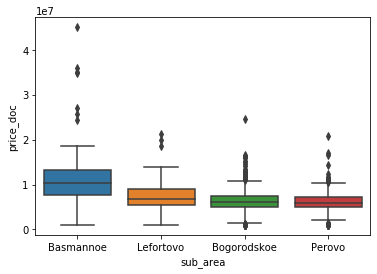

In [147]:
#2.10.4
import seaborn as sns
import pandas as pd
data = pd.read_csv('data_flats.csv', sep=";")
display(data.head())
# Basmannoe, 
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())
#display(data[data.sub_area == 'Basmannoe'])
#display(data[data.sub_area == 'Lefortovo'])
#display(data[data.sub_area == 'Perovo'])
#display(data[data.sub_area == 'Bogorodskoe'])
areas = ['Basmannoe', 'Lefortovo', 'Perovo', 'Bogorodskoe']

sns.boxplot(x = 'sub_area', y = 'price_doc', data = data[data.sub_area.str.contains('|'.join(areas))])

In [158]:
#2.12.6
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(3)


pd.set_option('display.max_columns', None)
vis_data = pd.read_csv("train.csv", encoding='ISO-8859-1', low_memory=False)


poly_features = pf.fit_transform(vis_data[['balance_due', 'discount_amount']])
poly_features
poly_features.shape

display(poly_features[:,0].mean())
display(poly_features[:,1].mean())
display(poly_features[:,2].mean())
display(poly_features[:,3].mean())
display(poly_features[:,4].mean())
display(poly_features[:,5].mean())
display(poly_features[:,6].mean())
display(poly_features[:,7].mean())
display(poly_features[:,8].mean())
display(poly_features[:,9].mean())

1.0

222.44905795306545

0.12516679584188953

417195.80993348145

-9.85531709187954

11.781739151278835

2042000980.3445697

117924.38420772974

-149.56407357394548

3074.1760485166155

In [175]:
#2.12.7
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
vis_data = pd.read_csv("train.csv", encoding='ISO-8859-1', low_memory=False)
vis_data.ticket_issued_date = pd.to_datetime(vis_data.ticket_issued_date)
vis_data['is_weekend'] = vis_data.ticket_issued_date.dt.weekday > 4
#display(vis_data)
display(vis_data.ticket_id[vis_data.is_weekend == True].count())

1620

In [189]:
#2.12.8
import pandas as pd
data = pd.read_csv('data_flats.csv', sep=";")
#display(data.head())


dummy=pd.get_dummies(data.sub_area)
data = data.drop('sub_area', axis=1)
#display(dummy)
data = pd.concat([data, dummy], axis=1)


ecol = {
    4: 'excellent',
    3: 'good',
    2: 'satisfactory',
    1: 'poor'
}

display(data.head())
display(data.info())

,id,full_sq,life_sq,floor,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,railroad_station_walk_km,railroad_station_walk_min,public_transport_station_km,public_transport_station_min_walk,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc,Ajeroport,Akademicheskoe,Alekseevskoe,Altuf'evskoe,Arbat,Babushkinskoe,Basmannoe,Begovoe,Beskudnikovskoe,Bibirevo,Birjulevo Vostochnoe,Birjulevo Zapadnoe,Bogorodskoe,Brateevo,Butyrskoe,Caricyno,Cheremushki,Chertanovo Central'noe,Chertanovo Juzhnoe,Chertanovo Severnoe,Danilovskoe,Dmitrovskoe,Donskoe,Dorogomilovo,Filevskij Park,Fili Davydkovo,Gagarinskoe,Gol'janovo,Golovinskoe,Hamovniki,Horoshevo-Mnevniki,Horoshevskoe,Hovrino,Ivanovskoe,Izmajlovo,Jakimanka,Jaroslavskoe,Jasenevo,Juzhnoe Butovo,Juzhnoe Medvedkovo,Juzhnoe Tushino,Juzhnoportovoe,Kapotnja,Kon'kovo,Koptevo,Kosino-Uhtomskoe,Kotlovka,Krasnosel'skoe,Krjukovo,Krylatskoe,Kuncevo,Kurkino,Kuz'minki,Lefortovo,Levoberezhnoe,Lianozovo,Ljublino,Lomonosovskoe,Losinoostrovskoe,Mar'ina Roshha,Mar'ino,Marfino,Matushkino,Meshhanskoe,Metrogorodok,Mitino,Molzhaninovskoe,Moskvorech'e-Saburovo,Mozhajskoe,Nagatino-Sadovniki,Nagatinskij Zaton,Nagornoe,Nekrasovka,Nizhegorodskoe,Novo-Peredelkino,Novogireevo,Novokosino,Obruchevskoe,Ochakovo-Matveevskoe,Orehovo-Borisovo Juzhnoe,Orehovo-Borisovo Severnoe,Ostankinskoe,Otradnoe,Pechatniki,Perovo,Pokrovskoe Streshnevo,Poselenie Desjonovskoe,Poselenie Filimonkovskoe,Poselenie Kievskij,Poselenie Klenovskoe,Poselenie Kokoshkino,Poselenie Krasnopahorskoe,Poselenie Marushkinskoe,Poselenie Mihajlovo-Jarcevskoe,Poselenie Moskovskij,Poselenie Mosrentgen,Poselenie Novofedorovskoe,Poselenie Pervomajskoe,Poselenie Rjazanovskoe,Poselenie Rogovskoe,Poselenie Shhapovskoe,Poselenie Shherbinka,Poselenie Sosenskoe,Poselenie Vnukovskoe,Poselenie Voronovskoe,Poselenie Voskresenskoe,Preobrazhenskoe,Presnenskoe,Prospekt Vernadskogo,Ramenki,Rjazanskij,Rostokino,Savelki,Savelovskoe,Severnoe,Severnoe Butovo,Severnoe Izmajlovo,Severnoe Medvedkovo,Severnoe Tushino,Shhukino,Silino,Sokol,Sokol'niki,Sokolinaja Gora,Solncevo,Staroe Krjukovo,Strogino,Sviblovo,Taganskoe,Tekstil'shhiki,Teplyj Stan,Timirjazevskoe,Troickij okrug,Troparevo-Nikulino,Tverskoe,Veshnjaki,Vnukovo,Vojkovskoe,Vostochnoe,Vostochnoe Degunino,Vostochnoe Izmajlovo,Vyhino-Zhulebino,Zamoskvorech'e,Zapadnoe Degunino,Zjablikovo,Zjuzino
0,1,43,27.0,4.0,5001.0,5,11065.0,5,0,240.0,1,0,7,3,0,16,1,2.590241,1.131260,13.575119,1.131260,0.145700,0.177975,2.158587,0.600973,1.080934,5.419893,65.038716,0.274985,3.299822,1.422391,10.918587,13.100618,13.675657,15.156211,10.814172,1.676258,0.485841,3.065047,1.107594,8.148591,3.516513,2.392353,6.715026,0.884350,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,34,19.0,3.0,3119.0,5,6237.0,8,0,229.0,1,0,6,1,1,3,0,0.936700,0.647337,7.620630,0.635053,0.147754,0.273345,0.550690,0.065321,0.966479,3.411993,40.943917,0.065263,0.783160,9.503405,3.103996,6.444333,8.132640,8.698054,6.910568,3.424716,0.668364,2.000154,8.972823,6.127073,1.161579,2.543747,1.852560,0.686252,0.519311,0.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Columns: 201 entries, id to Zjuzino
dtypes: float64(41), int64(13), object(1), uint8(146)
memory usage: 17.0+ MB


None